**Introduction**

Heart Disease is a major issue which contributes to global morbidity and mortality (Dai et al., 2021). In the United States of America, one person dies every 34 seconds from a heart disease (Centers for Disease Control and Prevention, 2022). Many people who have a heart disease do not show any physical symptoms and as a result are not diagnosed (Jin 2014). In turn, these individuals are not taking medications to help prevent the progression of the heart disease. Thus, predictive models are needed to help diagnose patients especially those who are asymptomatic in order to intervene with the progression of the disease.

In this project, we will be examining the Heart Disease Data from the University of California, Irvine's Machine Learning Repository (Janosi et al., 1988). The dataset is collected from three separate countries, the United States, Switzerland, and Hungary. It is composed of 14 different variables which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. All 14 variables are quantitative.

According to the Centre for Disease and Prevention (Centers for Disease Control and Prevention, 2022) the risk factors for a heart disease are: age, sex, high blood pressure, high cholesterol, diabetes. Thus, from the 14 variables, we only examined 6 from the dataset which are: age, sex, blood pressure, cholestrol, and fasting blooding sugar as these would most likely influence the progression of a heart disease, and the diagnosis of heart disease variable.

The major role of this project is to use the variables from the dataset to help predict whether a patient has a heart disease or not. 

**Methods and Results**

In [1]:
#group 24
library (ggplot2)
library (tidyverse)
library(tidymodels)
library(dplyr)
library (cowplot)
library (knitr)
set.seed (42)

hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ 

In [2]:
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num', 'thalach', 'cp', 'restecg') %>%
  mutate(
      num = dplyr::case_when(
          num %in% c(1, 2, 3, 4) ~ 1,
          TRUE ~ 0
      )
    )%>%
  drop_na() %>%
    filter(fbs %in% c(1, 0)) %>%
   # filter(chol %in% c(1, 0)) %>%
    mutate(trestbps = as.numeric (trestbps),
           chol = as.numeric (chol),
           fbs = as_factor (fbs),
           num = as_factor(num),
           thalach = as.numeric (thalach)
  ) %>% drop_na(trestbps) %>%
        drop_na (chol)

heart_data_cleaned %>% count(num)
head(heart_data_cleaned)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


num,n
<fct>,<int>
0,359
1,386


age,sex,trestbps,chol,fbs,num,thalach,cp,restecg
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>
28,1,130,132,0,0,185,2,2
29,1,120,243,0,0,160,2,0
30,0,170,237,0,0,170,1,1
31,0,100,219,0,0,150,2,1
32,0,105,198,0,0,165,2,0
32,1,110,225,0,0,184,2,0


In [6]:
#split data into training and testing data
heart_data_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = num)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

In [7]:
#begin training the model 

In [8]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune ()) |>
            set_engine("kknn") |>
            set_mode("classification")

In [9]:
knn_vfold <- vfold_cv (heart_data_train, v = 5, strata = num)

In [10]:
heart_recipe <- recipe (num ~ trestbps+fbs+age+sex+chol+thalach+cp, data = heart_data_train) |>
step_scale (age, trestbps, chol, thalach,cp) |>
step_center (age, trestbps, chol, thalach, cp)

heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          7

Operations:

Scaling for age, trestbps, chol, thalach, cp
Centering for age, trestbps, chol, thalach, cp

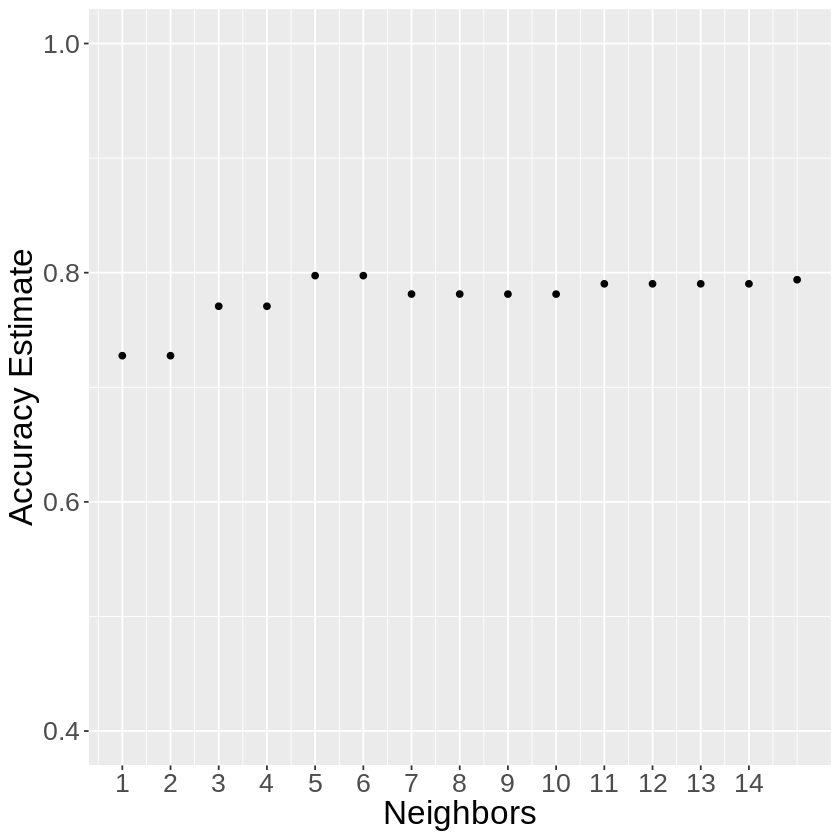

In [11]:
gridvals <- tibble (neighbors = seq (1,15))
knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) %>%
               tune_grid(resamples = knn_vfold, grid = gridvals) %>%
               collect_metrics()

knn_accuracy <- knn_results |>
filter (.metric == "accuracy")

accuracy_plot <- ggplot (knn_accuracy, aes (x= neighbors, y= mean)) +
geom_point () +
xlab ("Neighbors") +
ylab ("Accuracy Estimate") +
theme(text = element_text(size = 20)) +
scale_x_continuous(breaks = seq(0, 14, by = 1)) +
scale_y_continuous(limits = c(0.4, 1.0))
accuracy_plot



In [17]:
#we can see in this graph that k=3 seems to be a good value
knn_spec <- knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_spec) |>
               fit (heart_data_train)

knn_predict <- knn_fit |>
predict (heart_data_test) |>
bind_cols (heart_data_test)
head(knn_predict)

knn_metrics <- knn_predict |>
metrics (truth = num, estimate= .pred_class)
knn_metrics

.pred_class,age,sex,trestbps,chol,fbs,num,thalach,cp,restecg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>
0,33,1,120,298,0,0,185,3,0
0,34,0,130,161,0,0,190,2,0
0,35,1,150,264,0,0,168,2,0
0,36,1,112,340,0,0,184,3,0
0,36,1,150,160,0,0,172,3,0
0,37,0,130,211,0,0,142,3,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7433155
kap,binary,0.4859107


In [20]:
#create a confusion matrix
heart_conf_matrix <- knn_predict |>
conf_mat (truth = num, estimate = .pred_class)
heart_conf_matrix

          Truth
Prediction  0  1
         0 65 25
         1 25 72

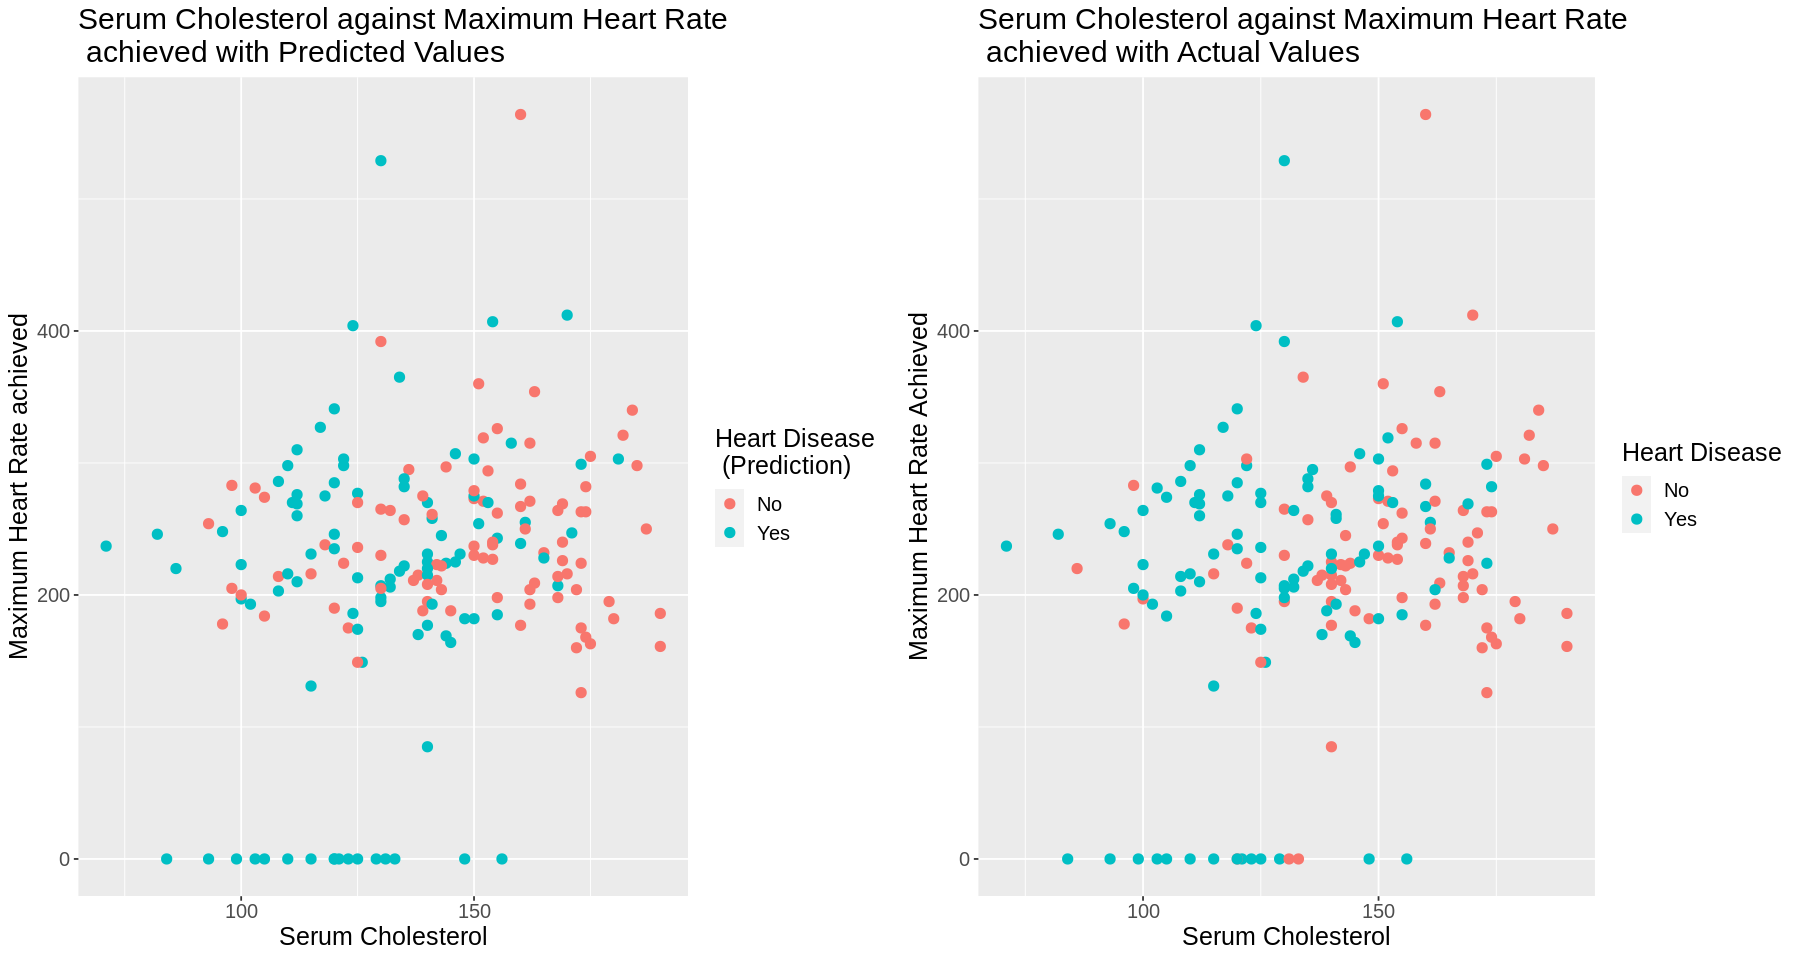

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)
prediction_plot <- ggplot (knn_predict, aes (x=thalach, y= chol)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate achieved")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Serum Cholesterol against Maximum Heart Rate \n achieved with Predicted Values")


actual_plot <- ggplot (knn_predict, aes (x=thalach, y= chol)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate Achieved")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Serum Cholesterol against Maximum Heart Rate \n achieved with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)
#size of label and points

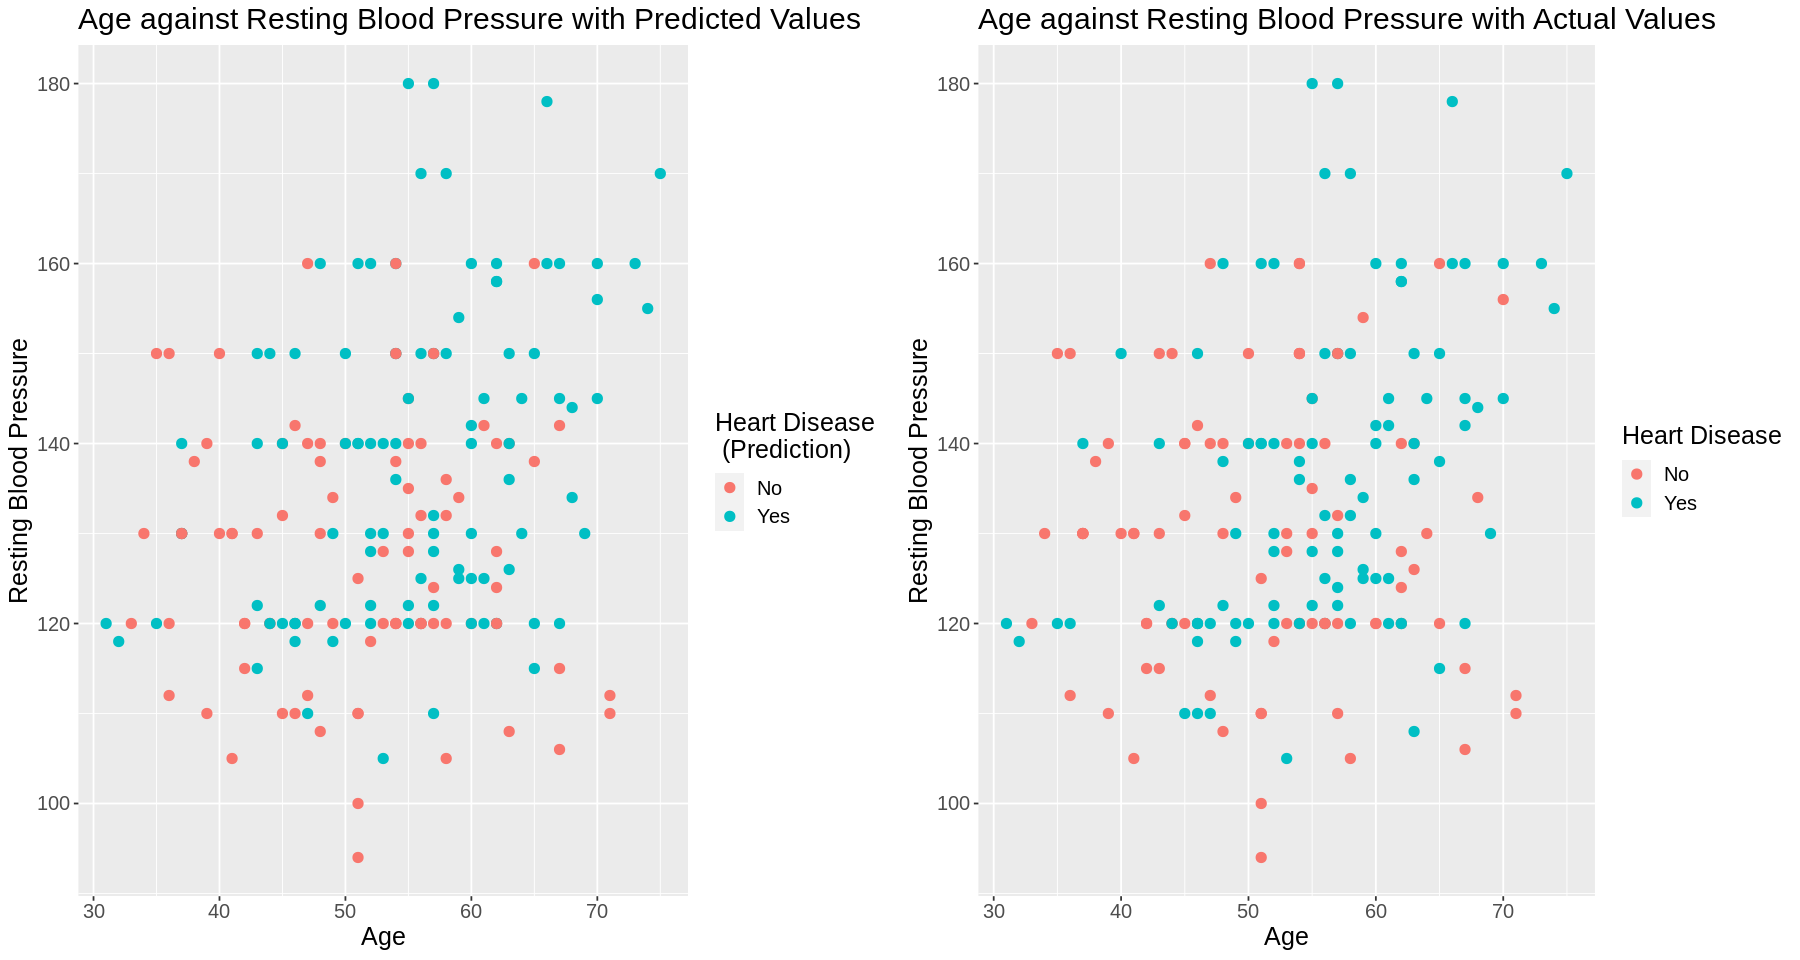

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8)
prediction_plot <- ggplot (knn_predict, aes (x=age, y= trestbps)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Age against Resting Blood Pressure with Predicted Values")


actual_plot <- ggplot (knn_predict, aes (x=age, y= trestbps)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Age against Resting Blood Pressure with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)

**Discussion**

In summary, we created a classification model with k=5 and an accuracy of 60% in order to predict the presence or absence of a heart disease based on five variables, age, sex, blood pressure, cholestrol, and fasting blooding sugar, which were considered risk factors according to the CDC. From our cross-validation results, a k-value of 5 gave optimal accuracy and changing the value to a nearby 1 (increasing or decreasing by a small number) doesn't change the accuracy too much as seen in table XX. 
An accuracy of 60 % is not what we expected to find as we expected the accuracy to be higher since we were examining variables that were risk factors for heart disease according to the CDC. Therefore we examined past literature to see if other variables were related to heart disease. Two variables, chest pain presence and maximum heart rate were found to be associated with heart disease (Detrano et al., 1989 and Gennari et al., 1989). Thus, we added "cp" and "thalach" corresponding to chest pain presence and maximum heart rate  to our classifcation model. Including these two variables increased our accuracy to 73%. Thus, it showed that these variables were important and relevant to our classification model. What the accuracy tells us is that 73% of the time (73 out of 100), our model will predict the presence or absence of a heart disease correctly.
Next, we created four plots to examine the model visually. In the first two plots (figures XX and YY), we plotted maximum heart rate vs serum cholestrol while colouring the data points based on heart disease presence. In the second set of plots, we examined resting blood pressure vs age in figures XX and figure YY. Figures XX and XX were both created using the predicted heart disease diagnosis from our model and Figures YY and YY were from the actual diagnosis from the original data. Visually, the plots from both sets looked similar between the predicted and actual value. Thus visually, it appears to be doing a decent job at predicting the presence or absence of a heart disease. The results from the plots were as expected as we would expect the model to predict correctly the presence of a heart disease 73% of the time. However, it's important to note that just examining the model visually is not a good indication of the fit of the model, it is imperative we calculate the accuracy which we have done prior and obtained 73%.
By looking at the Confusion Matrix we can see that many people have asymptomatic heart diseases which are often undiagnosed (in our model 25 patients) and in turn not treated for their disease. This could affect their quality of life. Thus with our predictive model, we can help diagnose patients with or without symptoms. However, since our model only has a 73% accuracy level it may not be suitable for use in a clinical setting as is. This is because we could misdiagnose 27% of the patients using our model which could be costly for patients and the healthcare system. Thus, in order to use a predictive model such as ours in a clinical setting, the model needs to be further tuned to increase the accuracy. Some ways to do so is examining whether there are additional variables that could be added to create the model which are relevant to heart disease.

From our project, future questions can predict the severity level of the heart disease by including the original levels (0-4) of the "num" variable from the original data set (we changed it to a binary variable for this project). This would be an expansion to our current project where we only ask whether someone has a heart disease or not and not the severity.

**References:**

1. Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 17, 2022, from https://www.cdc.gov/heartdisease/facts.htm 
2. Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 18, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 
3. Dai, H., Bragazzi, N. L., Younis, A., Zhong, W., Liu, X., Wu, J., & Grossman, E. (2021). Worldwide trends in prevalence, mortality, and disability-adjusted life years for hypertensive heart disease from 1990 to 2017. Hypertension, 77(4), 1223-1233.
4. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
5. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
6. Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease Data Set, UCI Machine Learning Repository.
